##### 1.  Importing libraries and data
##### 2.  Data Cleaning
##### 3.  Data Prep for Regression Analysis
##### 4.  Regression Analysis

## 1. Iimporting libraries and data

In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
## ensuring graphs created are displayed in notebook

%matplotlib inline

In [4]:
path = r'C:\Users\matth\world_uni_rankings'

In [5]:
df = pd.read_csv(os.path.join(path, '01 Data', 'timedata_new.csv'), index_col = False)

## 2. Data Cleaning

In [6]:
df.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'income',
       'total_score', 'num_students', 'year'],
      dtype='object')

In [7]:
df.head(20)

,world_rank,university_name,country,teaching,income,total_score,num_students,year
0,1,Harvard University,United States of America,99.7,34.5,96.1,20152,2011
1,2,California Institute of Technology,United States of America,97.7,83.7,96.0,2243,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,87.5,95.6,11074,2011
3,4,Stanford University,United States of America,98.3,64.3,94.3,15596,2011
4,5,Princeton University,United States of America,90.9,48.9,94.2,7929,2011
5,6,University of Cambridge,United Kingdom,90.5,57.0,91.2,18812,2011
6,6,University of Oxford,United Kingdom,88.2,73.5,91.2,19919,2011
7,8,"University of California, Berkeley",United States of America,84.2,48.9,91.1,36186,2011
8,9,Imperial College London,United Kingdom,89.2,92.9,90.6,15060,2011
9,10,Yale University,United States of America,92.1,48.9,89.5,11751,2011


In [8]:
df.shape

(2603, 8)

#### Missing Values

In [10]:
df.isnull().sum()

world_rank         0
university_name    0
country            0
teaching           0
income             0
total_score        0
num_students       0
year               0
dtype: int64

#### Duplicate checks

In [11]:
dups = df.duplicated()

In [12]:
dups.shape # No dups

(2603,)

In [ ]:
#### Extreme Value Checks

C:\Users\matth\AppData\Local\Temp\ipykernel_41816\1807391759.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_score'], bins=25)


<Axes: xlabel='total_score', ylabel='Density'>

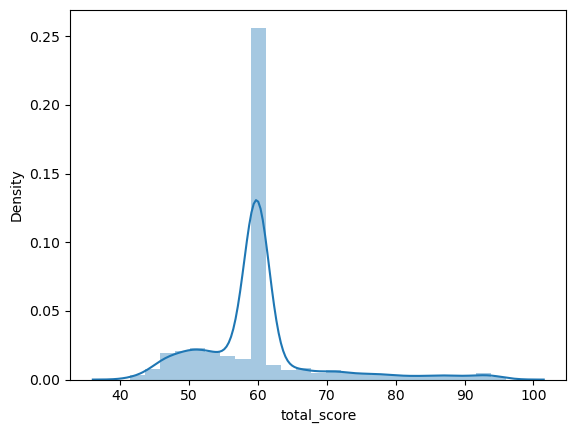

In [13]:
sns.distplot(df['total_score'], bins=25)

In [14]:
df['total_score'].mean() # Check the mean

59.82128313484441

In [15]:
df['total_score'].median() # Check the median

59.8

In [16]:
df['total_score'].max() # Check the max

96.1

## 3. Data Prep for Regression Analysis

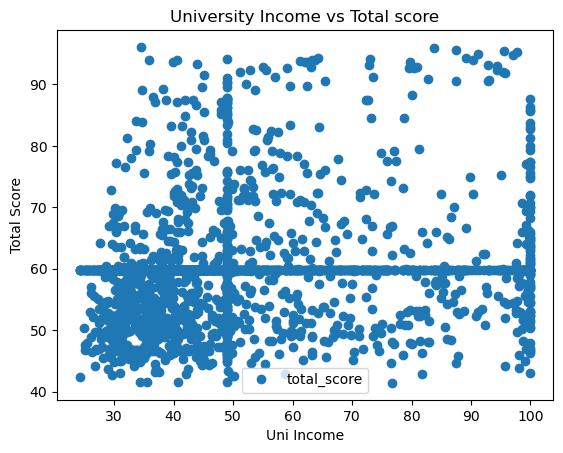

In [18]:
df.plot(x = 'income', y='total_score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('University Income vs Total score')  
plt.xlabel('Uni Income')  
plt.ylabel('Total Score')  
plt.show()

In [19]:
X = df['income'].values.reshape(-1,1)
y = df['total_score'].values.reshape(-1,1)

In [20]:
X

array([[34.5],
       [83.7],
       [87.5],
       ...,
       [37.9],
       [40.4],
       [39.8]])

In [21]:
y

array([[96.1],
       [96. ],
       [95.6],
       ...,
       [59.8],
       [59.8],
       [59.8]])

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

In [23]:
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

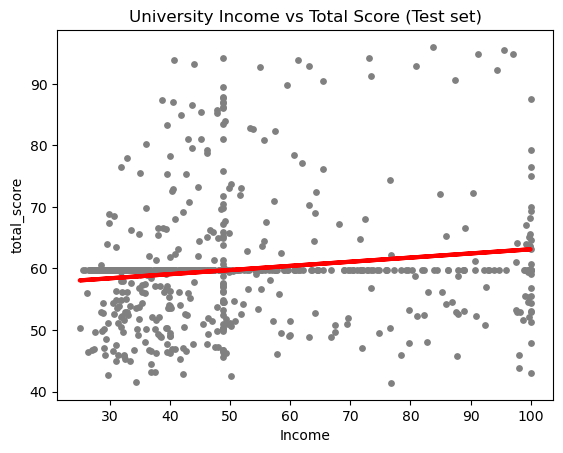

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('University Income vs Total Score (Test set)')
plot_test.xlabel('Income')
plot_test.ylabel('total_score')
plot_test.show()

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.06735222]]
Mean squared error:  79.95870138867245
R2 score:  0.012577502348627867


In [29]:
y_predicted

array([[58.76033838],
       [59.29242093],
       [58.57175216],
       [59.22506871],
       [62.27612432],
       [59.66959337],
       [59.11730515],
       [58.26193195],
       [60.63273013],
       [59.0701586 ],
       [62.51859232],
       [59.70326948],
       [59.06342338],
       [59.26548004],
       [59.0095416 ],
       [58.51113516],
       [59.17792215],
       [58.33601939],
       [62.99005787],
       [61.02337301],
       [59.5281537 ],
       [63.11129186],
       [60.14105891],
       [59.66959337],
       [63.03720442],
       [59.60897637],
       [59.76388648],
       [58.26193195],
       [58.47072383],
       [58.53807605],
       [59.02974727],
       [60.10064758],
       [63.11129186],
       [58.91524849],
       [62.35021177],
       [59.4069197 ],
       [58.22152061],
       [60.09391236],
       [58.32254895],
       [59.5281537 ],
       [58.3696955 ],
       [63.11129186],
       [58.14743317],
       [60.26902813],
       [58.16090361],
       [58

In [30]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,59.8,58.760338
1,59.8,59.292421
2,59.8,58.571752
3,59.8,59.225069
4,52.9,62.276124
5,46.7,59.669593
6,59.8,59.117305
7,59.8,58.261932
8,48.8,60.632730
9,49.1,59.070159


In [31]:
#### Compare how the regression fits the training set

In [32]:
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [33]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.06735222]]
Mean squared error:  71.33868374669618
R2 score:  0.02530377341636092


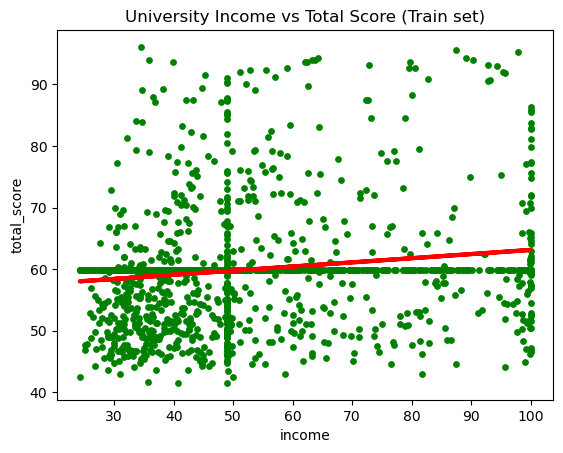

In [35]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('University Income vs Total Score (Train set)')
plot_test.xlabel('income')
plot_test.ylabel('total_score')
plot_test.show()

##### Include your thoughts on how well the model performed on the test set in a markdown cell.

###### The data bias is that as univeristy income increases then the total score of the university increases. But the results show there are no differences
###### However, from the graphs there is no correlation between income and scores and based on me taking the "mean" value where doing the data cleaning this has resulted in errorneous values in some areas